In [ ]:
#importing libraries
import sys
import pandas as pd
import sklearn
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#loading dataset
data= pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Child-Data.csv",na_values=['?'])

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
print(pd.DataFrame(data).isnull().sum())  # Check missing values per feature


A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64


In [ ]:
data['age'].fillna(data['age'].median(), inplace=True)  # Use Median


<ipython-input-5-95ccf2089c5c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)  # Use Median


In [ ]:
print(data.isnull().sum())


A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 0
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64


In [ ]:
print("Number of duplicate rows:", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 2
Number of duplicate rows: 0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assume 'data' is your dataset
y = data['Class/ASD']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Encode categorical features
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    if feature != 'Class/ASD':  # Exclude target variable
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])

# Feature names (excluding target)
feature_names = data.drop(columns=['Class/ASD']).columns

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(data.drop('Class/ASD', axis=1), y)

# Get feature importance
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort descending

# Print feature names with their importance scores
print("Feature Importance Ranking:")
for i in range(15):  # Show top 10
    feature_name = feature_names[sorted_indices[i]]
    importance_score = feature_importances[sorted_indices[i]]
    print(f"{i+1}. {feature_name}: {importance_score:.4f}")


Feature Importance Ranking:
1. result: 0.5551
2. A4_Score: 0.0884
3. A9_Score: 0.0608
4. A10_Score: 0.0497
5. A8_Score: 0.0424
6. A5_Score: 0.0290
7. A6_Score: 0.0289
8. A1_Score: 0.0283
9. A3_Score: 0.0270
10. country_of_res: 0.0189
11. A7_Score: 0.0170
12. ethnicity: 0.0114
13. A2_Score: 0.0113
14. age: 0.0106
15. relation: 0.0079


**IMPORTING LIBRARIES**

In [ ]:
!pip install tensorflow
import tensorflow as tf

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn Components
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, log_loss, confusion_matrix
)

# Keras Components
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization,
    Input, Add, Activation, LSTM
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Imbalanced Learning
from imblearn.over_sampling import SMOTE

**SELECTED FEATURES**

In [ ]:
selected_features = [
    "A4_Score", "A9_Score", "A8_Score", "A10_Score", "A5_Score",
    "A3_Score", "A1_Score", "country_of_res","A7_Score", "A6_Score", "A2_Score",
    "age",
]

In [ ]:
# Handle missing values BEFORE splitting
# --------------------------------------
# 1. Check for missing values
print("Missing values before handling:")a
print(data[selected_features].isnull().sum())

# 2. Impute missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['country_of_res'].fillna('Unknown', inplace=True)  # Add new category for missing

# 3. Verify no missing values remain
print("\nMissing values after handling:")
print(data[selected_features].isnull().sum())


**X AND Y INPUT**

In [ ]:
# Convert scores and prepare data
for feature in selected_features:
    if '_Score' in feature:
        data[feature] = data[feature].astype(int)

X = pd.get_dummies(data[selected_features])
y = data['Class/ASD'].map({'YES': 1, 'NO': 0})

In [ ]:
# Check final class distribution
print("Original classes:", np.bincount(y_train))

# Use safe SMOTE configuration
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Resampled classes:", np.bincount(y_train))

Original classes: [120 120]
Resampled classes: [120 120]


**DENSE MODEL**

Resampled classes: [120 120]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5938 - loss: 0.7320

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.5769 - loss: 0.7253 - val_accuracy: 0.6667 - val_loss: 0.5947
Epoch 2/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8125 - loss: 0.5678

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7377 - loss: 0.5853 - val_accuracy: 0.7708 - val_loss: 0.5353
Epoch 3/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8438 - loss: 0.5192

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8429 - loss: 0.4918 - val_accuracy: 0.8750 - val_loss: 0.4869
Epoch 4/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9375 - loss: 0.4762

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8979 - loss: 0.4431 - val_accuracy: 0.9167 - val_loss: 0.4418
Epoch 5/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8438 - loss: 0.4541

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8980 - loss: 0.4020 - val_accuracy: 0.8958 - val_loss: 0.3972
Epoch 6/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8125 - loss: 0.4302

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9115 - loss: 0.3551 - val_accuracy: 0.9167 - val_loss: 0.3554
Epoch 7/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9375 - loss: 0.3469

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9303 - loss: 0.3069 - val_accuracy: 0.9375 - val_loss: 0.3159
Epoch 8/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9375 - loss: 0.2725

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9308 - loss: 0.2650 - val_accuracy: 0.9375 - val_loss: 0.2819
Epoch 9/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.1917

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9711 - loss: 0.2174 - val_accuracy: 0.9375 - val_loss: 0.2544
Epoch 10/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9375 - loss: 0.1898

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9650 - loss: 0.1956 - val_accuracy: 0.9375 - val_loss: 0.2332
Epoch 11/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9688 - loss: 0.2035

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9709 - loss: 0.1820 - val_accuracy: 0.9792 - val_loss: 0.2174
Epoch 12/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9688 - loss: 0.1692

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9745 - loss: 0.1535 - val_accuracy: 0.9792 - val_loss: 0.2044
Epoch 13/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9375 - loss: 0.1870

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9644 - loss: 0.1591 - val_accuracy: 0.9792 - val_loss: 0.1927
Epoch 14/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9688 - loss: 0.1385

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9798 - loss: 0.1328 - val_accuracy: 0.9792 - val_loss: 0.1853
Epoch 15/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0892

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9985 - loss: 0.1025 - val_accuracy: 0.9792 - val_loss: 0.1776
Epoch 16/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0915

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9976 - loss: 0.1054 - val_accuracy: 0.9792 - val_loss: 0.1728
Epoch 17/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.0984

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9965 - loss: 0.0932 - val_accuracy: 0.9792 - val_loss: 0.1696
Epoch 18/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0936

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9985 - loss: 0.0852 - val_accuracy: 0.9792 - val_loss: 0.1673
Epoch 19/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9688 - loss: 0.0903

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9883 - loss: 0.0807 - val_accuracy: 0.9792 - val_loss: 0.1656
Epoch 20/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0496

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9985 - loss: 0.0611 - val_accuracy: 0.9792 - val_loss: 0.1644
Epoch 21/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 1.0000 - loss: 0.0778

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9950 - loss: 0.0701 - val_accuracy: 0.9792 - val_loss: 0.1638
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9965 - loss: 0.0573 - val_accuracy: 0.9792 - val_loss: 0.1641
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0522 - val_accuracy: 0.9792 - val_loss: 0.1641
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0465 - val_accuracy: 0.9792 - val_loss: 0.1650
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0442 - val_accuracy: 0.9792 - val_loss: 0.1665
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0446 - val_accuracy: 0.9583 - val_loss: 0.1678
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0303 - val_accuracy: 0.9583 - val_loss: 0.1676
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0344 - val_accuracy: 0.9583 - val_loss: 0.1680
Epoc

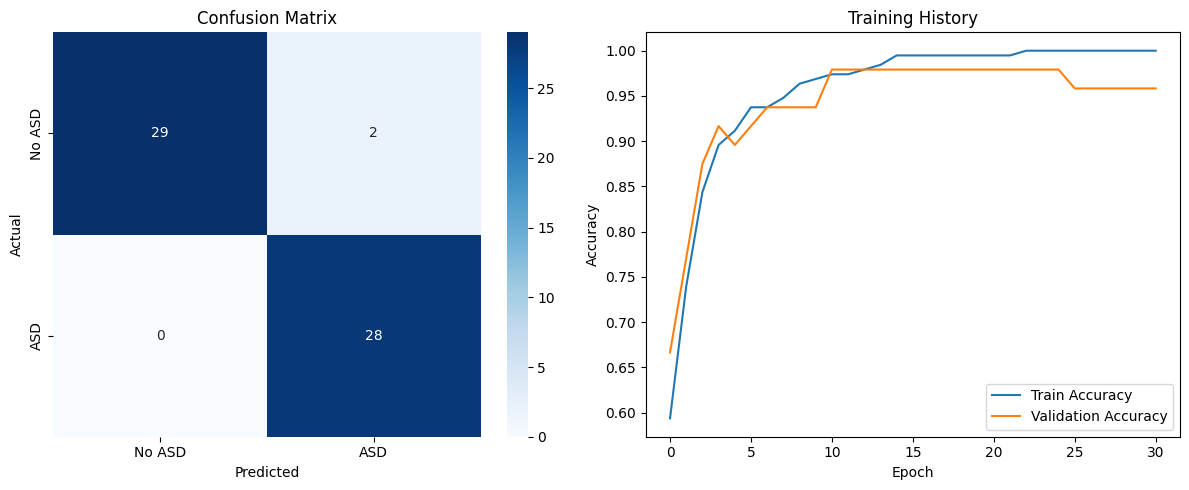

In [ ]:
# Split Data Before Scaling & Oversampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE (Corrected strategy)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Resampled classes:", np.bincount(y_train))


# Feature Scaling (AFTER splitting to avoid data leakage)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Dense Model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_dense_model.h5', save_best_only=True)
]

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate Model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Compute Metrics
dense_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print Corrected Metrics in Tabular Format
print("\nTraining Accuracy: {:.2f}%".format(train_acc * 100))
print("Testing Accuracy: {:.2f}%\n".format(test_acc * 100))

print("{:<20} {:<10}".format("Metric", "Value"))
print("=" * 35)
for metric, value in dense_metrics.items():
    if metric != 'Confusion Matrix':
        print("{:<20} {:.2f}".format(metric, value))

# Visualization
plt.figure(figsize=(12, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dense_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

**DROPOUT MODEL**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.4961 - loss: 0.7367 - val_accuracy: 0.7755 - val_loss: 0.6169
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5996 - loss: 0.6613 - val_accuracy: 0.7959 - val_loss: 0.5634
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6543 - loss: 0.6170 - val_accuracy: 0.8163 - val_loss: 0.5207
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7702 - loss: 0.5558 - val_accuracy: 0.8571 - val_loss: 0.4716
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7788 - loss: 0.5195 - val_accuracy: 0.8980 - val_loss: 0.4202
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8187 - loss: 0.4762 - val_accuracy: 0.9184 - val_loss: 0.3690
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8662 - loss: 0.3826 - val_accuracy: 0.9388 - val_loss: 0.3197
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8516 - loss: 0.3935 - val_accuracy: 0.9388 - val_loss: 0.2772

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

Training Accuracy: 99.17%
Testing Accuracy: 96.72%

Detailed Metrics:
Accuracy (%): 96.72
Precision (%): 93.75
Recall (%): 100.00
F1 Score (%): 96.77
ROC AUC (%): 100.00
Log Loss: 0.07


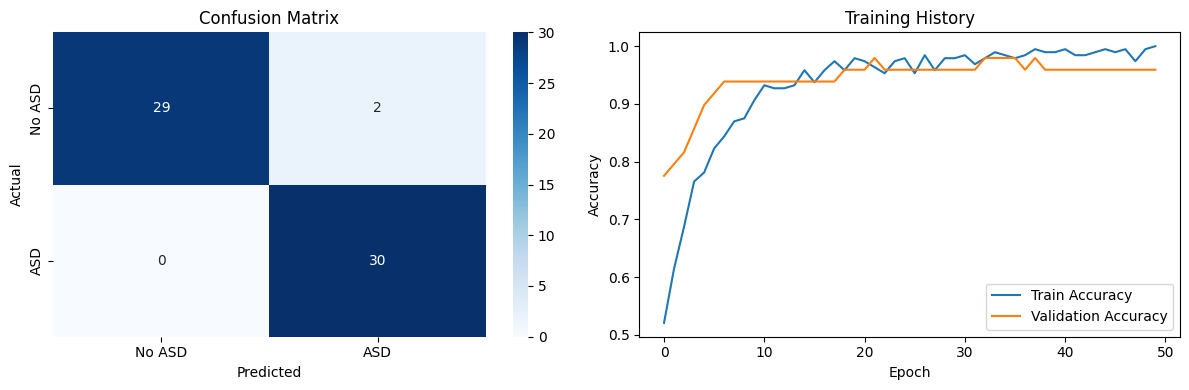

In [ ]:


# Handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
dropout_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in dropout_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dropout_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


**BATCH NORMALIZATION**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.4712 - loss: 1.2049 - val_accuracy: 0.7347 - val_loss: 0.6130
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6597 - loss: 0.6804 - val_accuracy: 0.8163 - val_loss: 0.5343
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7847 - loss: 0.4590 - val_accuracy: 0.8571 - val_loss: 0.4738
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8586 - loss: 0.3004 - val_accuracy: 0.8776 - val_loss: 0.4303
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8803 - loss: 0.2479 - val_accuracy: 0.9388 - val_loss: 0.3992
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8994 - loss: 0.2391 - val_accuracy: 0.9184 - val_loss: 0.3756
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9394 - loss: 0.1547 - val_accuracy: 0.9184 - val_loss: 0.3554
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9135 - loss: 0.2038 - val_accuracy: 0.9184 - val_loss: 0.3373
Epoch 9/50


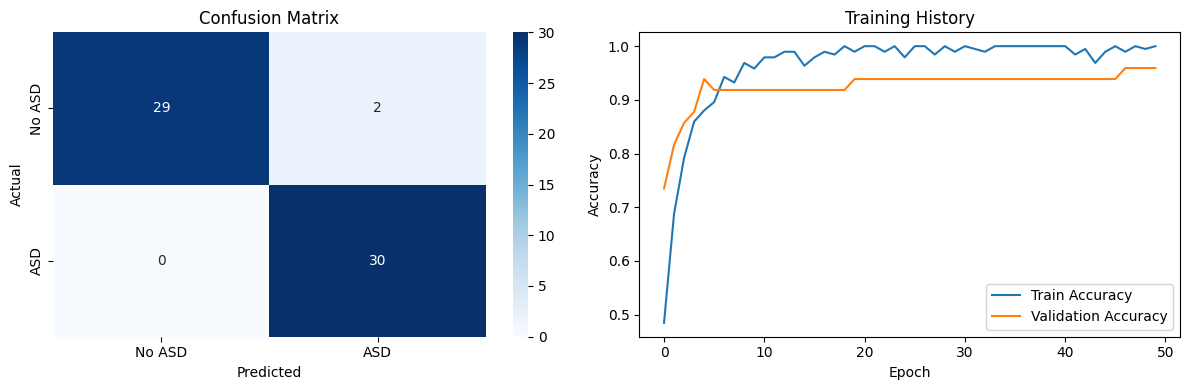

In [ ]:

# Handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Convert to one-hot encoding for categorical crossentropy
y_res = to_categorical(y_res)  # 🔥 Critical change for softmax

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.2,
    random_state=42,
    stratify=y_res  # Stratify on original class distribution
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==============================================================
# Batch Normalization Model
# ==============================================================
batch_norm_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(2, activation='softmax')  # 2 units for one-hot encoding
])

# Compile with lower learning rate
batch_norm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = batch_norm_model.fit(
    X_train, y_train,
    epochs=50,  # Increased epochs for better convergence
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate
train_loss, train_acc = batch_norm_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = batch_norm_model.evaluate(X_test, y_test, verbose=0)

# Generate predictions
y_pred_probs = batch_norm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert y_test back from one-hot for metrics
y_test_labels = np.argmax(y_test, axis=1)

# Calculate metrics
batch_norm_metrics = {
    'Accuracy (%)': accuracy_score(y_test_labels, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test_labels, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test_labels, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test_labels, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test_labels, y_pred_probs[:, 1]) * 100,  # Use probability for ROC AUC
    'Log Loss': log_loss(y_test_labels, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test_labels, y_pred_classes)
}
# Print results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in batch_norm_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dropout_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


**LSTM**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.3969 - loss: 0.6983 - val_accuracy: 0.9388 - val_loss: 0.6623
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9158 - loss: 0.6442 - val_accuracy: 0.8776 - val_loss: 0.6003
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9603 - loss: 0.5716 - val_accuracy: 0.8980 - val_loss: 0.5021
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9612 - loss: 0.4516 - val_accuracy: 0.9184 - val_loss: 0.3640
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9654 - loss: 0.3104 - val_accuracy: 0.8980 - val_loss: 0.2722
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9642 - loss: 0.2064 - val_accuracy: 0.8776 - val_loss: 0.2837
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9102 - loss: 0.2103 - val_accuracy: 0.8776 - val_loss: 0.2736
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9226 - loss: 0.1954 - val_accuracy: 0.9388 - val_loss: 0.2424
Epoch 9/50

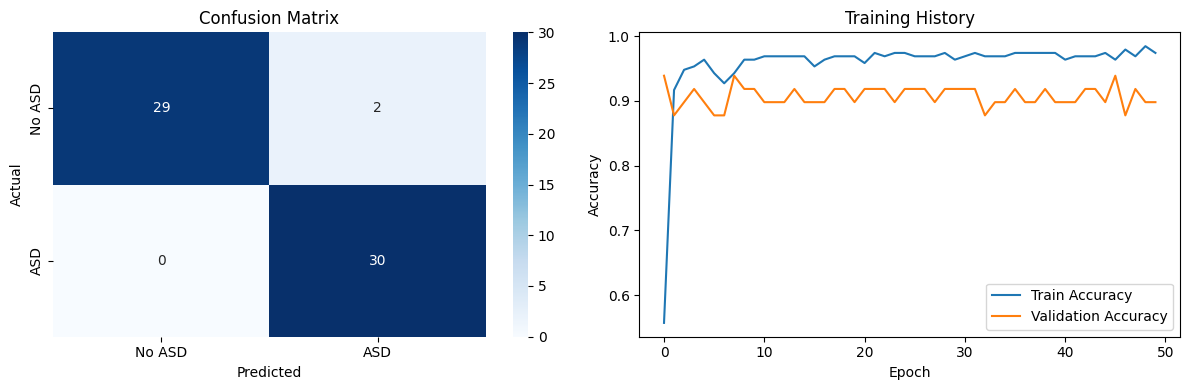

In [ ]:

# Handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.4),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
lstm_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in lstm_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dropout_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


**RESIDUAL MODEL**

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5021 - loss: 0.9027

6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - accuracy: 0.5025 - loss: 0.8999 - val_accuracy: 0.3958 - val_loss: 0.7298
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5863 - loss: 0.8444

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5807 - loss: 0.8429 - val_accuracy: 0.5417 - val_loss: 0.6921
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5738 - loss: 0.7459

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5707 - loss: 0.7485 - val_accuracy: 0.6458 - val_loss: 0.6644
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5953 - loss: 0.6981

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5921 - loss: 0.7000 - val_accuracy: 0.7708 - val_loss: 0.6473
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6122 - loss: 0.6551

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6147 - loss: 0.6542 - val_accuracy: 0.7917 - val_loss: 0.6334
Epoch 6/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5938 - loss: 0.7361

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6147 - loss: 0.6316 - val_accuracy: 0.7708 - val_loss: 0.6263
Epoch 7/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7188 - loss: 0.5761

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7321 - loss: 0.5815 - val_accuracy: 0.7083 - val_loss: 0.6227
Epoch 8/50
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6654 - loss: 0.5899

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6826 - loss: 0.5792 - val_accuracy: 0.7083 - val_loss: 0.6179
Epoch 9/50
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7051 - loss: 0.5892 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.7157 - loss: 0.5767 - val_accuracy: 0.7083 - val_loss: 0.6123
Epoch 10/50
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7917 - loss: 0.4256

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7795 - loss: 0.4440 - val_accuracy: 0.6875 - val_loss: 0.6073
Epoch 11/50
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6777 - loss: 0.5983

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6864 - loss: 0.5829 - val_accuracy: 0.6667 - val_loss: 0.6000
Epoch 12/50
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7936 - loss: 0.4894 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.7836 - loss: 0.4923 - val_accuracy: 0.6875 - val_loss: 0.5929
Epoch 13/50
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6797 - loss: 0.5576

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6857 - loss: 0.5431 - val_accuracy: 0.6875 - val_loss: 0.5833
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7924 - loss: 0.4435 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7923 - loss: 0.4430 - val_accuracy: 0.7292 - val_loss: 0.5730
Epoch 15/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step - accuracy: 0.5938 - loss: 0.6014

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7338 - loss: 0.4879 - val_accuracy: 0.7292 - val_loss: 0.5630
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8262 - loss: 0.4146

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8235 - loss: 0.4172 - val_accuracy: 0.7292 - val_loss: 0.5531
Epoch 17/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8125 - loss: 0.3727

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7935 - loss: 0.4100 - val_accuracy: 0.7292 - val_loss: 0.5420
Epoch 18/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8750 - loss: 0.3099

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8523 - loss: 0.3324 - val_accuracy: 0.7083 - val_loss: 0.5305
Epoch 19/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7812 - loss: 0.4686

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8083 - loss: 0.4183 - val_accuracy: 0.7083 - val_loss: 0.5182
Epoch 20/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9375 - loss: 0.3055

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9000 - loss: 0.3139 - val_accuracy: 0.7500 - val_loss: 0.5064
Epoch 21/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7188 - loss: 0.4920

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7705 - loss: 0.4362 - val_accuracy: 0.7708 - val_loss: 0.4939
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8140 - loss: 0.4273

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8197 - loss: 0.4218 - val_accuracy: 0.7917 - val_loss: 0.4810
Epoch 23/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8660 - loss: 0.3251

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8582 - loss: 0.3292 - val_accuracy: 0.7917 - val_loss: 0.4671
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8893 - loss: 0.3467

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8880 - loss: 0.3453 - val_accuracy: 0.8333 - val_loss: 0.4539
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8898 - loss: 0.3079

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8877 - loss: 0.3100 - val_accuracy: 0.7917 - val_loss: 0.4399
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8284 - loss: 0.3475

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8306 - loss: 0.3457 - val_accuracy: 0.7917 - val_loss: 0.4278
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8538 - loss: 0.3499 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8516 - loss: 0.3505 - val_accuracy: 0.7917 - val_loss: 0.4161
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8694 - loss: 0.3312

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8680 - loss: 0.3332 - val_accuracy: 0.7917 - val_loss: 0.4047
Epoch 29/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8514 - loss: 0.3597

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8507 - loss: 0.3552 - val_accuracy: 0.8333 - val_loss: 0.3950
Epoch 30/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9375 - loss: 0.2782

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8939 - loss: 0.2956 - val_accuracy: 0.8333 - val_loss: 0.3850
Epoch 31/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8438 - loss: 0.2865

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8522 - loss: 0.3113 - val_accuracy: 0.8333 - val_loss: 0.3735
Epoch 32/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8438 - loss: 0.3327

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8319 - loss: 0.3276 - val_accuracy: 0.8542 - val_loss: 0.3620
Epoch 33/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9062 - loss: 0.2383

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8710 - loss: 0.2812 - val_accuracy: 0.8542 - val_loss: 0.3545
Epoch 34/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8750 - loss: 0.2836

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9023 - loss: 0.2852 - val_accuracy: 0.8542 - val_loss: 0.3465
Epoch 35/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9375 - loss: 0.2459

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9420 - loss: 0.2499 - val_accuracy: 0.8958 - val_loss: 0.3399
Epoch 36/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - accuracy: 0.9062 - loss: 0.2710

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9182 - loss: 0.2641 - val_accuracy: 0.8958 - val_loss: 0.3327
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9136 - loss: 0.2647 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9133 - loss: 0.2653 - val_accuracy: 0.8958 - val_loss: 0.3256
Epoch 38/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9062 - loss: 0.2270

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8891 - loss: 0.2423 - val_accuracy: 0.8958 - val_loss: 0.3190
Epoch 39/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8750 - loss: 0.2435

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9007 - loss: 0.2169 - val_accuracy: 0.8958 - val_loss: 0.3142
Epoch 40/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8793 - loss: 0.2402

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8825 - loss: 0.2388 - val_accuracy: 0.8958 - val_loss: 0.3083
Epoch 41/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9062 - loss: 0.2392

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9275 - loss: 0.2399 - val_accuracy: 0.8958 - val_loss: 0.3016
Epoch 42/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8930 - loss: 0.2617

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8968 - loss: 0.2569 - val_accuracy: 0.8958 - val_loss: 0.2955
Epoch 43/50
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9251 - loss: 0.2371

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9286 - loss: 0.2334 - val_accuracy: 0.8958 - val_loss: 0.2902
Epoch 44/50
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8900 - loss: 0.2108 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.8931 - loss: 0.2194 - val_accuracy: 0.8958 - val_loss: 0.2841
Epoch 45/50
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9596 - loss: 0.2195 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9460 - loss: 0.2254 - val_accuracy: 0.8958 - val_loss: 0.2778
Epoch 46/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9026 - loss: 0.2500

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9126 - loss: 0.2392 - val_accuracy: 0.9167 - val_loss: 0.2714
Epoch 47/50
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9108 - loss: 0.2058 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9023 - loss: 0.2138 - val_accuracy: 0.9167 - val_loss: 0.2664
Epoch 48/50
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9447 - loss: 0.2150

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9526 - loss: 0.2101 - val_accuracy: 0.9167 - val_loss: 0.2627
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9446 - loss: 0.2308

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9443 - loss: 0.2303 - val_accuracy: 0.9167 - val_loss: 0.2588
Epoch 50/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9375 - loss: 0.1977

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9137 - loss: 0.2284 - val_accuracy: 0.9167 - val_loss: 0.2565
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step

Training Accuracy: 96.25%
Testing Accuracy: 91.53%

Detailed Metrics:
Accuracy (%): 91.53
Precision (%): 84.85
Recall (%): 100.00
F1 Score (%): 91.80
ROC AUC (%): 98.85
Log Loss: 0.28


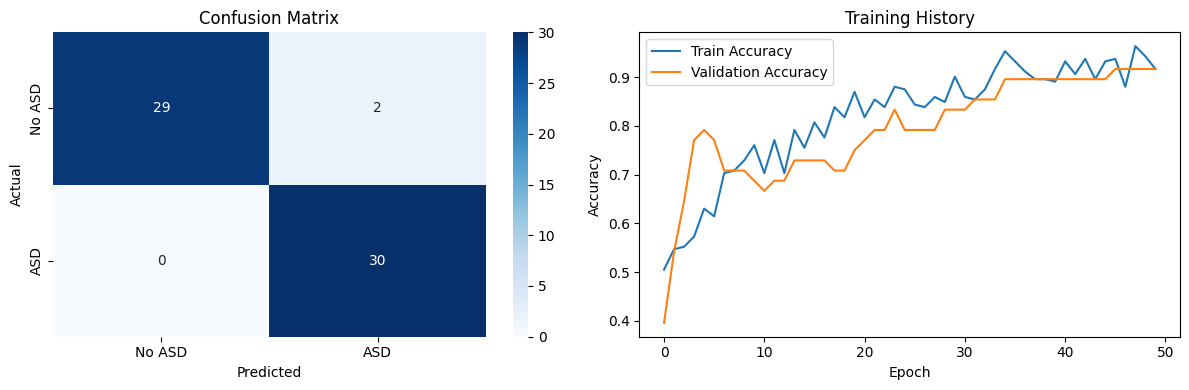

In [ ]:
# Handle Class Imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Residual Block Function
def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    if x.shape[-1] != units:
        shortcut = Dense(units)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Dense(units)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)

    x = Dense(units)(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])
    return Activation('relu')(x)

# Build Model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(256)(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = residual_block(x, 256)
x = residual_block(x, 128)
x = residual_block(x, 64)
x = residual_block(x, 32)

output_layer = Dense(1, activation='sigmoid')(x)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate Model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate Metrics
residual_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print Results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in residual_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dropout_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


**SIGMOID MODEL**

Epoch 1/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5156 - loss: 0.8525

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.5762 - loss: 0.7387 - val_accuracy: 0.6042 - val_loss: 0.6374
Epoch 2/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7656 - loss: 0.4367

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7812 - loss: 0.4339 - val_accuracy: 0.7292 - val_loss: 0.5697
Epoch 3/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8594 - loss: 0.3504

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8535 - loss: 0.3412 - val_accuracy: 0.7917 - val_loss: 0.5160
Epoch 4/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9375 - loss: 0.2683

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9329 - loss: 0.2722 - val_accuracy: 0.8750 - val_loss: 0.4737
Epoch 5/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9219 - loss: 0.2713

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9310 - loss: 0.2470 - val_accuracy: 0.8958 - val_loss: 0.4389
Epoch 6/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.1721

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9850 - loss: 0.1734 - val_accuracy: 0.8958 - val_loss: 0.4093
Epoch 7/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.9688 - loss: 0.1846

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9661 - loss: 0.1771 - val_accuracy: 0.8958 - val_loss: 0.3831
Epoch 8/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 1.0000 - loss: 0.1331

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9805 - loss: 0.1583 - val_accuracy: 0.9375 - val_loss: 0.3606
Epoch 9/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9844 - loss: 0.1191

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9798 - loss: 0.1309 - val_accuracy: 0.9375 - val_loss: 0.3411
Epoch 10/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9531 - loss: 0.1967

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9564 - loss: 0.1677 - val_accuracy: 0.9375 - val_loss: 0.3250
Epoch 11/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9844 - loss: 0.1253

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9824 - loss: 0.1210 - val_accuracy: 0.9375 - val_loss: 0.3105
Epoch 12/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.9844 - loss: 0.1199

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9727 - loss: 0.1334 - val_accuracy: 0.9583 - val_loss: 0.2976
Epoch 13/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.1196

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9883 - loss: 0.1340 - val_accuracy: 0.9792 - val_loss: 0.2860
Epoch 14/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9844 - loss: 0.0732

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9889 - loss: 0.0900 - val_accuracy: 0.9792 - val_loss: 0.2759
Epoch 15/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0842

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9928 - loss: 0.0899 - val_accuracy: 0.9792 - val_loss: 0.2676
Epoch 16/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 1.0000 - loss: 0.0953

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9876 - loss: 0.0980 - val_accuracy: 0.9792 - val_loss: 0.2606
Epoch 17/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9844 - loss: 0.0796

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9915 - loss: 0.0776 - val_accuracy: 0.9792 - val_loss: 0.2538
Epoch 18/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9844 - loss: 0.0803

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9889 - loss: 0.0745 - val_accuracy: 0.9792 - val_loss: 0.2476
Epoch 19/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9844 - loss: 0.0804

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9889 - loss: 0.0773 - val_accuracy: 0.9792 - val_loss: 0.2426
Epoch 20/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0781

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 0.0724 - val_accuracy: 0.9792 - val_loss: 0.2378
Epoch 21/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 1.0000 - loss: 0.0402

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9928 - loss: 0.0672 - val_accuracy: 0.9792 - val_loss: 0.2334
Epoch 22/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9844 - loss: 0.0589

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9798 - loss: 0.0715 - val_accuracy: 0.9792 - val_loss: 0.2295
Epoch 23/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9531 - loss: 0.1073

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9622 - loss: 0.0959 - val_accuracy: 0.9792 - val_loss: 0.2238
Epoch 24/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9844 - loss: 0.0620

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9863 - loss: 0.0654 - val_accuracy: 0.9792 - val_loss: 0.2186
Epoch 25/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 1.0000 - loss: 0.0538

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9974 - loss: 0.0559 - val_accuracy: 0.9792 - val_loss: 0.2142
Epoch 26/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0420

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9928 - loss: 0.0638 - val_accuracy: 0.9792 - val_loss: 0.2099
Epoch 27/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0555

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 1.0000 - loss: 0.0506 - val_accuracy: 0.9792 - val_loss: 0.2060
Epoch 28/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 0.0410

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9974 - loss: 0.0422 - val_accuracy: 0.9792 - val_loss: 0.2027
Epoch 29/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0482

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.0480 - val_accuracy: 0.9792 - val_loss: 0.1998
Epoch 30/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.0475

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9974 - loss: 0.0485 - val_accuracy: 0.9792 - val_loss: 0.1975
Epoch 31/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0490

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.0427 - val_accuracy: 0.9792 - val_loss: 0.1952
Epoch 32/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9844 - loss: 0.0398

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9915 - loss: 0.0392 - val_accuracy: 0.9792 - val_loss: 0.1927
Epoch 33/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0178

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9954 - loss: 0.0343 - val_accuracy: 0.9792 - val_loss: 0.1901
Epoch 34/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0344

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 0.0384 - val_accuracy: 0.9792 - val_loss: 0.1874
Epoch 35/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 1.0000 - loss: 0.0505

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9954 - loss: 0.0464 - val_accuracy: 0.9792 - val_loss: 0.1858
Epoch 36/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0637

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.0517 - val_accuracy: 0.9792 - val_loss: 0.1831
Epoch 37/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9531 - loss: 0.1099

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9701 - loss: 0.0794 - val_accuracy: 0.9792 - val_loss: 0.1792
Epoch 38/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0272

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9954 - loss: 0.0332 - val_accuracy: 0.9792 - val_loss: 0.1756
Epoch 39/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0216

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9948 - loss: 0.0328 - val_accuracy: 0.9792 - val_loss: 0.1724
Epoch 40/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 1.0000 - loss: 0.0238

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9954 - loss: 0.0359 - val_accuracy: 0.9792 - val_loss: 0.1687
Epoch 41/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0310

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.0326 - val_accuracy: 0.9792 - val_loss: 0.1651
Epoch 42/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0245

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9974 - loss: 0.0293 - val_accuracy: 0.9792 - val_loss: 0.1616
Epoch 43/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0200

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9928 - loss: 0.0339 - val_accuracy: 0.9792 - val_loss: 0.1589
Epoch 44/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.9844 - loss: 0.0354

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9889 - loss: 0.0317 - val_accuracy: 0.9792 - val_loss: 0.1570
Epoch 45/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9531 - loss: 0.0694

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9701 - loss: 0.0551 - val_accuracy: 0.9792 - val_loss: 0.1556
Epoch 46/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0478

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9954 - loss: 0.0399 - val_accuracy: 0.9792 - val_loss: 0.1540
Epoch 47/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9915 - loss: 0.0444 - val_accuracy: 0.9583 - val_loss: 0.1546
Epoch 48/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9688 - loss: 0.0527

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9831 - loss: 0.0418 - val_accuracy: 0.9583 - val_loss: 0.1526
Epoch 49/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0343

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.0290 - val_accuracy: 0.9583 - val_loss: 0.1503
Epoch 50/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 1.0000 - loss: 0.0232

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 0.0248 - val_accuracy: 0.9583 - val_loss: 0.1491
Epoch 51/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0220

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 0.0221 - val_accuracy: 0.9583 - val_loss: 0.1472
Epoch 52/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9974 - loss: 0.0258 - val_accuracy: 0.9583 - val_loss: 0.1479
Epoch 53/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.0242 - val_accuracy: 0.9583 - val_loss: 0.1507
Epoch 54/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9948 - loss: 0.0371 - val_accuracy: 0.9583 - val_loss: 0.1545
Epoch 55/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 0.9583 - val_loss: 0.1574
Epoch 56/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0234 - val_accuracy: 0.9583 - val_loss: 0.1589
Epoch 57/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0290 - val_accuracy: 0.9583 - val_loss: 0.1600
Epoch 58/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9954 - loss: 0.0204 - val_accuracy: 0.9583 - val_loss: 0.16

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.0131 - val_accuracy: 0.9583 - val_loss: 0.1419
Epoch 65/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0103

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.9583 - val_loss: 0.1372
Epoch 66/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0123

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.0118 - val_accuracy: 0.9792 - val_loss: 0.1340
Epoch 67/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9844 - loss: 0.0240

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9915 - loss: 0.0184 - val_accuracy: 0.9792 - val_loss: 0.1317
Epoch 68/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0136

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9974 - loss: 0.0177 - val_accuracy: 0.9792 - val_loss: 0.1302
Epoch 69/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 0.9792 - val_loss: 0.1310
Epoch 70/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.9792 - val_loss: 0.1310
Epoch 71/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0184 - val_accuracy: 0.9792 - val_loss: 0.1327
Epoch 72/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 0.9792 - val_loss: 0.1340
Epoch 73/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 0.9792 - val_loss: 0.1345
Epoch 74/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0149 - val_accuracy: 0.9792 - val_loss: 0.1350
Epoch 75/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 0.9792 - val_loss: 0.13

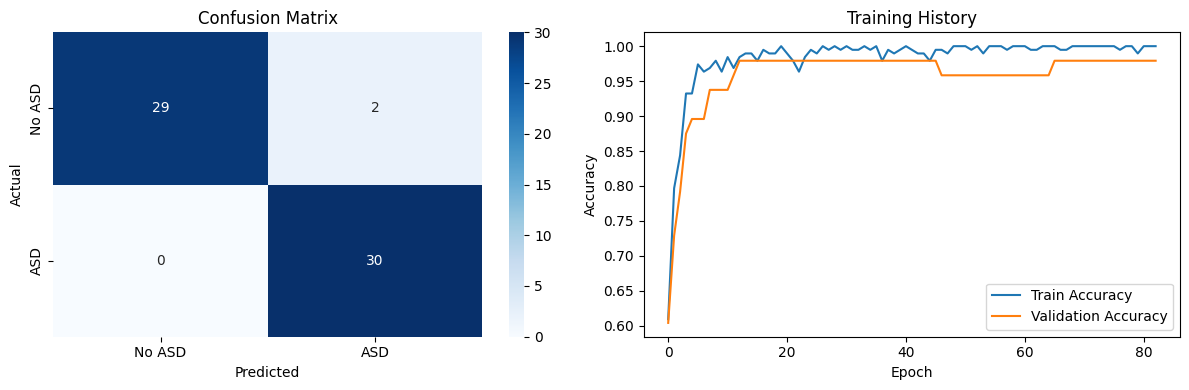

In [ ]:

# Handle Class Imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sigmoid Model Architecture
def build_sigmoid_model(input_shape):
    inputs = Input(shape=input_shape)

    x = Dense(256)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)

    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.1)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    return Model(inputs=inputs, outputs=outputs)

# Build and Compile Model
model = build_sigmoid_model((X_train.shape[1],))  # Notice the tuple format
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ModelCheckpoint('best_sigmoid_model.h5', save_best_only=True)
]

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate Model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate Metrics
sigmoid_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print Results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in sigmoid_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dropout_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


**COMPARISON METRICS**

In [ ]:
import pandas as pd

# Combine all model metrics
model_metrics = {
    'Batch Norm': batch_norm_metrics,
    'Dropout': dropout_metrics,
    'Dense': dense_metrics,
    'LSTM': lstm_metrics,
    'Residual': residual_metrics,
    'Sigmoid': sigmoid_metrics
}

# Convert to DataFrame
df_metrics = pd.DataFrame(model_metrics)

# Print metrics in tabular form
print("\nModel Evaluation Metrics:\n")
print(df_metrics.T)  # Transpose for better readability




Model Evaluation Metrics:

           Accuracy (%) Precision (%) Recall (%) F1 Score (%) ROC AUC (%)  \
Batch Norm    93.442623     90.909091  96.774194        93.75   99.462366   
Dropout       96.721311         93.75      100.0    96.774194       100.0   
Dense         96.610169     93.333333      100.0    96.551724       100.0   
LSTM          96.721311         93.75      100.0    96.774194   99.139785   
Residual      91.525424     84.848485      100.0    91.803279   98.847926   
Sigmoid       96.610169     93.333333      100.0    96.551724       100.0   

            Log Loss    Confusion Matrix  
Batch Norm  0.121772  [[27, 3], [1, 30]]  
Dropout     0.068395  [[29, 2], [0, 30]]  
Dense       0.079179  [[29, 2], [0, 28]]  
LSTM        0.119988  [[29, 2], [0, 30]]  
Residual    0.278434  [[26, 5], [0, 28]]  
Sigmoid     0.068138  [[29, 2], [0, 28]]  
